# Importing required libraries and data

In [1]:
# Import the pandas library, which is a popular data manipulation and analysis library in Python
import pandas as pd

# Specify the file path of the CSV file you want to read
file = "D:\\Text Based Analysis Sem 2\\air_india_reviews.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file)

# Display the first 20 rows of the DataFrame
df.head(20)

C:\Users\tejas\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


published_date  rating    type  helpful_votes  \
0   2024-03-28T17:44:04-04:00       1  review              0   
1   2024-03-28T17:24:01-04:00       1  review              0   
2   2024-03-28T16:31:49-04:00       1  review              0   
3   2024-03-27T22:43:53-04:00       3  review              0   
4   2024-03-27T08:12:41-04:00       1  review              0   
5   2024-03-27T03:42:57-04:00       1  review              0   
6   2024-03-26T07:11:39-04:00       1  review              0   
7   2024-03-26T04:01:37-04:00       2  review              0   
8   2024-03-25T23:55:47-04:00       1  review              0   
9   2024-03-25T03:55:08-04:00       1  review              0   
10  2024-03-24T23:57:20-04:00       5  review              0   
11  2024-03-24T21:54:37-04:00       1  review              0   
12  2024-03-24T11:05:43-04:00       1  review              0   
13  2024-03-24T00:36:32-04:00       1  review              0   
14  2024-03-23T23:45:05-04:00       2  review              0   
15  2024-03-23T08:24:18-04:00       1  review              1   
16  2024-03-23T04:22:55-04:00       2  review              0   
17  2024-03-22T22:22:24-04:00       1  review              1   
18  2024-03-22T05:02:27-04:00       3  review              1   
19  2024-03-22T03:51:38-04:00       1  review              1   

                                                title  \
0                     BAD SERVICE AND BAD HOSPITALITY   
1                AI 188 and AI 187 flight nightmare !   
2         worst airline to travel dont waste ur money   
3                                Good, Can be Better!   
4                          Poor airlines and services   
5                               very unfriendly staff   
6                                   Disgusting flight   
7           Never travel with kids vey bad experience   
8   Would rather travel by Indian public transport...   
9                      Bad baggage management service   
10           Air India business class is great value.   
11  Still probably the worst airline in Star Alliance   
12            Don't ever fly with this filthy airline   
13                                      Horrendous!!!   
14                                    Bad experience!   
15          Most worst experience ever from Air India   
16                  So many things were not working -   
17    Ratan Tata group but pathetic employee attitude   
18  Don't fly Air India business for the lounge fa...   
19             Air India Flag Ship Representing India   

                                                 text  
0   From their side my baggage is broken but still...  
1   I took AI 188 noon -9th March 2024 - it was de...  
2   one of worst flight to fly with book one way l...  
3   The positive aspects on my flight were: punctu...  
4   Extremally poor services in flight, aircraft i...  
5   i booked a flight del to Vancouver and return ...  
6   Very disappointed service and even they don’t ...  
7   If a travelled with two kids staff not support...  
8   Absolutely disgusting service. They said my se...  
9   Very bad experience with baggage service, I la...  
10  I had a bad back prior to taking this trip so ...  
11  Never flown AI, though have been 25 years on t...  
12  Horrible experience,  flight was late 6 hours,...  
13  Aircraft was filthy dirty and smelly. No infli...  
14  1. The sound system didn't work,\n2. The small...  
15  My flight had to be from Chennai to Newark via...  
16  First thing people need to be aware of is that...  
17  Tata group and their CEO and Management and al...  
18  Everything was fine at Heathrow. Plane seats w...  
19  I recently experienced a 2-hour flight delay w...

# Look at a couple of texts

In [2]:
# Print the first 400 characters of the "text" column for the row at index 2666
print(repr(df.iloc[2666]["text"][0:400]))

# Print the first 400 characters of the "text" column for the row at index 4726
print(repr(df.iloc[4726]["text"][0:400]))

"Air India is flying high on this route and the flight time is too good. What's good to see is that the food served on this route is good and fresh too. Though the variety can be improved further.."
'Nice flight experience in terms of departure and arrival and inflight services. The food was good and tasty.'


# Split speech into sentences

In [3]:
# Import the re (regular expression) module
import re
# Apply a lambda function to the "text" column
# The lambda function splits the text into paragraphs using the regular expression pattern '\.\s*\n'
df["paragraphs"] = df["text"].map(lambda text: re.split('\.\s*\n', text))
# Create a new column "number_of_paragraphs"
df["number_of_paragraphs"] = df["paragraphs"].map(len)

# TFIDF

In [4]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import the TfidfVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the STOP_WORDS set from the spacy.lang.en module
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
tfidf_text_vectorizer = TfidfVectorizer(stop_words='english',
min_df=5, max_df=0.7)
# Fit the TfidfVectorizer on the 'text' column of the DataFrame and transform it into a sparse matrix
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
# Print the shape of the resulting sparse matrix
tfidf_text_vectors.shape

(4840, 3994)

# Data frame of sentences

In [7]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "text": paragraph, "year": year }
for paragraphs, year in zip(df["paragraphs"], df["rating"])
for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

text  year
0  From their side my baggage is broken but still...     1
1  I took AI 188 noon -9th March 2024 - it was de...     1
2  Air India booked me on air India flight leavin...     1
3  I took a tax to my location in Punjab - took 8...     1
4  Nightmare  continue on my return flight - Took...     1
5  Its was hell at DEL airport while waiting 15 h...     1
6  Its been 3 days no resolution, i am informed i...     1
7  Past 10 years on Business - have taken over 90...     1
8  one of worst flight to fly with book one way l...     1
9  The positive aspects on my flight were: punctu...     3

# TFIDF of the sentences DF

In [8]:
# Import the TfidfVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the STOP_WORDS set from the spacy.lang.en module
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
# Fit the TfidfVectorizer on the 'text' column of the paragraph_df DataFrame and transform it into a sparse matrix
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])
# Print the shape of the resulting sparse matrix
tfidf_para_vectors.shape

(9947, 4045)

# NMF

In [9]:
# Import the NMF class from the sklearn.decomposition module
from sklearn.decomposition import NMF

In [10]:
# Create an instance of the NMF class with 10 components (topics) and a random state of 42
nmf_text_model = NMF(n_components=10, random_state=42)

# Fit the NMF model to the tfidf_text_vectors (document-term matrix) and transform it to obtain the document-topic matrix
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)

# Get the topic-word matrix from the fitted NMF model
H_text_matrix = nmf_text_model.components_

C:\Users\tejas\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [11]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                   abs(words[largest[i]]*100.0/total)))
            
# Call the function outside its definition with the appropriate arguments
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
 flight (5.52)
 hours (2.40)
 delayed (2.18)
 delhi (1.68)
 time (1.43)

Topic 01
 good (19.13)
 food (3.69)
 service (3.64)
 experience (3.34)
 overall (2.85)

Topic 02
 india (8.17)
 air (8.00)
 flights (1.24)
 travel (1.20)
 fly (1.15)

Topic 03
 seat (2.30)
 seats (1.73)
 entertainment (1.62)
 broken (1.40)
 working (1.29)

Topic 04
 customer (2.37)
 refund (2.26)
 ticket (1.53)
 cancelled (1.33)
 service (1.05)

Topic 05
 staff (2.56)
 check (1.96)
 baggage (1.37)
 luggage (1.24)
 airport (1.23)

Topic 06
 class (7.73)
 business (7.01)
 economy (2.89)
 lounge (1.33)
 seats (1.19)

Topic 07
 crew (7.11)
 cabin (4.33)
 excellent (1.48)
 aircraft (1.21)
 service (1.10)

Topic 08
 worst (7.32)
 airline (6.08)
 service (3.76)
 bad (2.83)
 experience (1.90)

Topic 09
 comfortable (3.54)
 food (3.16)
 leg (2.78)
 time (2.67)
 nice (2.44)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you already have tfidf_text_vectorizer defined

# Get feature names from the TfidfVectorizer object
feature_names = tfidf_text_vectorizer.get_feature_names_out()

# Now, use the display_topics function with the correct feature names
display_topics(nmf_text_model, feature_names)


Topic 00
 flight (5.52)
 hours (2.40)
 delayed (2.18)
 delhi (1.68)
 time (1.43)

Topic 01
 good (19.13)
 food (3.69)
 service (3.64)
 experience (3.34)
 overall (2.85)

Topic 02
 india (8.17)
 air (8.00)
 flights (1.24)
 travel (1.20)
 fly (1.15)

Topic 03
 seat (2.30)
 seats (1.73)
 entertainment (1.62)
 broken (1.40)
 working (1.29)

Topic 04
 customer (2.37)
 refund (2.26)
 ticket (1.53)
 cancelled (1.33)
 service (1.05)

Topic 05
 staff (2.56)
 check (1.96)
 baggage (1.37)
 luggage (1.24)
 airport (1.23)

Topic 06
 class (7.73)
 business (7.01)
 economy (2.89)
 lounge (1.33)
 seats (1.19)

Topic 07
 crew (7.11)
 cabin (4.33)
 excellent (1.48)
 aircraft (1.21)
 service (1.10)

Topic 08
 worst (7.32)
 airline (6.08)
 service (3.76)
 bad (2.83)
 experience (1.90)

Topic 09
 comfortable (3.54)
 food (3.16)
 leg (2.78)
 time (2.67)
 nice (2.44)


In [13]:
# Import the NMF (Non-Negative Matrix Factorization) class from the sklearn.decomposition module
nmf_para_model = NMF(n_components=10, random_state=42)
# Fit the NMF model to the TF-IDF vectors of the paragraphs
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
# Get the topic-word matrix (H) from the trained model
H_para_matrix = nmf_para_model.components_
# Display the topics with their top words
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 flight (7.12)
 hours (2.11)
 delhi (2.00)
 delayed (1.85)
 mumbai (1.14)

Topic 01
 india (10.51)
 air (10.21)
 fly (1.53)
 travel (1.28)
 flights (0.98)

Topic 02
 good (12.68)
 food (7.05)
 comfortable (2.48)
 leg (2.06)
 crew (1.79)

Topic 03
 service (10.05)
 customer (6.99)
 poor (2.20)
 care (1.66)
 bad (1.53)

Topic 04
 seats (2.70)
 seat (2.61)
 entertainment (1.95)
 work (1.43)
 broken (1.35)

Topic 05
 staff (5.05)
 check (2.23)
 airport (1.37)
 ground (1.06)
 boarding (1.04)

Topic 06
 experience (19.99)
 overall (8.70)
 nice (3.30)
 bad (3.04)
 flying (2.13)

Topic 07
 time (15.77)
 reached (1.44)
 departure (1.43)
 flights (1.29)
 arrival (1.28)

Topic 08
 class (9.29)
 business (8.10)
 economy (3.39)
 fly (1.11)
 lounge (1.01)

Topic 09
 airline (9.47)
 worst (5.74)
 airlines (1.74)
 travel (1.69)
 fly (1.63)


In [14]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([10.66616651, 10.15714726, 16.95950255, 10.39995184,  7.67309369,
       12.46540642,  5.54387227,  7.12397637,  8.82243539, 10.18844769])

# Topic sizes

In [15]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([10.87414349, 16.13128295, 11.3781002 ,  8.76685876, 11.72015925,
       12.02085973,  7.02929776,  7.43553286,  5.63012009,  9.01364492])

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the set of stopwords to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words='english', min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape


(9947, 4045)

In [17]:
# Creating a Latent Dirichlet Allocation (LDA) model with 10 topics using the sklearn library.
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)

# Transforming the count-based document-term matrix (count_para_vectors) into topic-document distribution matrix.
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)

# Retrieving the topic-term distribution matrix from the trained LDA model.
H_lda_para_matrix = lda_para_model.components_

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the stop words set to a list
stopwords_list = list(stopwords)

# Initialize CountVectorizer with the list of stop words
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
print(count_para_vectors.shape)


C:\Users\tejas\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(9947, 4051)


In [19]:
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Get feature names from the vocabulary generated by CountVectorizer
feature_names = count_para_vectorizer.get_feature_names_out()

# Display topics using the vocabulary generated by CountVectorizer
display_topics(lda_para_model, feature_names)


Topic 1:
flag dehli hospitality degraded movement

Topic 2:
flag incompetence air thy crazy

Topic 3:
incompetence air claims buses airline

Topic 4:
loved incompetence cheaters baggage air

Topic 5:
flag thy boarded cheaters airport

Topic 6:
gmail air incompetence flag focus

Topic 7:
se season flag wont ensuring

Topic 8:
flag incompetence air red cancellations

Topic 9:
focus flag gmail series separated

Topic 10:
curtains series incompetence air airline


In [20]:
# Calculate the sum of probabilities for each topic across all documents.
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 8.27716014,  9.86484383, 11.36850543,  7.85581594,  8.92079279,
       12.43875939,  9.81856747,  9.48160652, 10.46856292, 11.50538556])

In [21]:
# Enable inline plotting of matplotlib figures in Jupyter Notebook or JupyterLab.
%matplotlib inline
# Importing necessary libraries for word cloud visualization.
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML

# Adjusting the height of the output cell to accommodate larger word cloud images.
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

# Define a function to generate and display word clouds for each topic in the LDA model.
def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

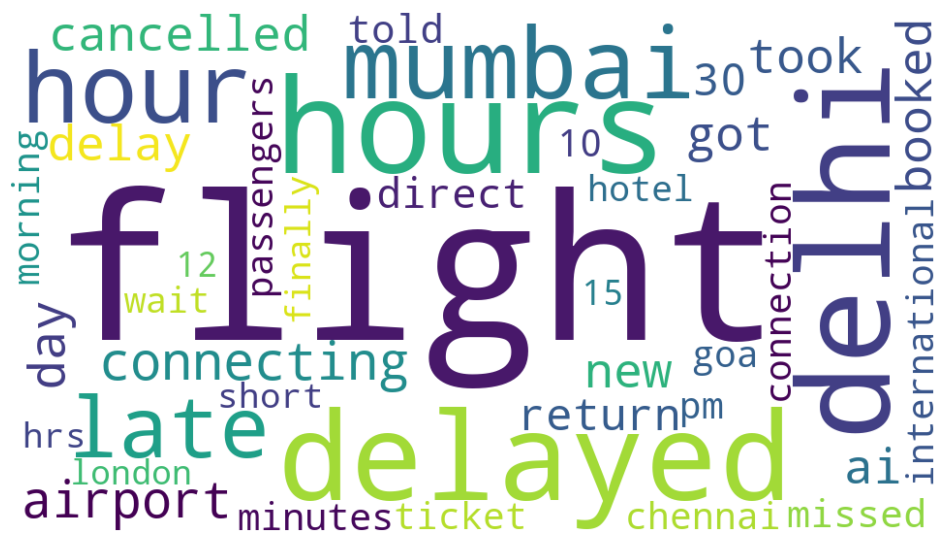

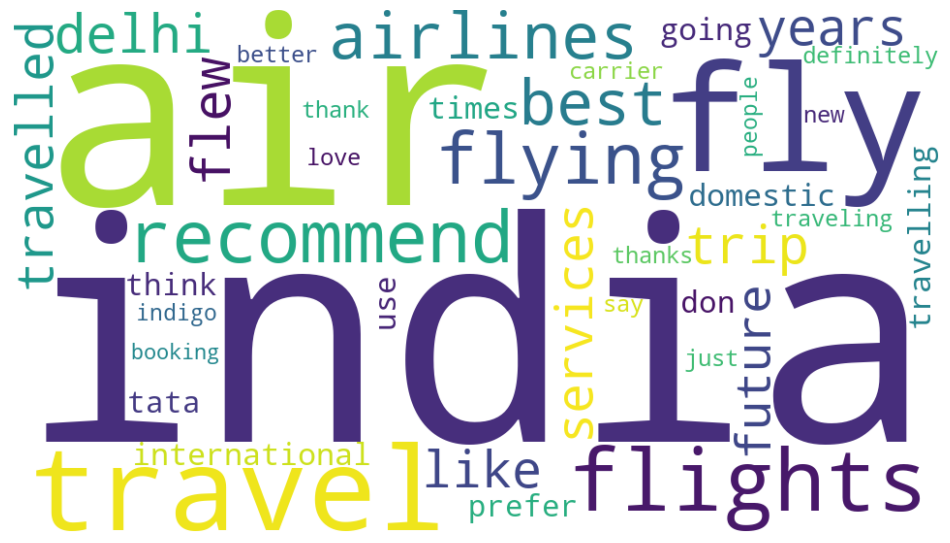

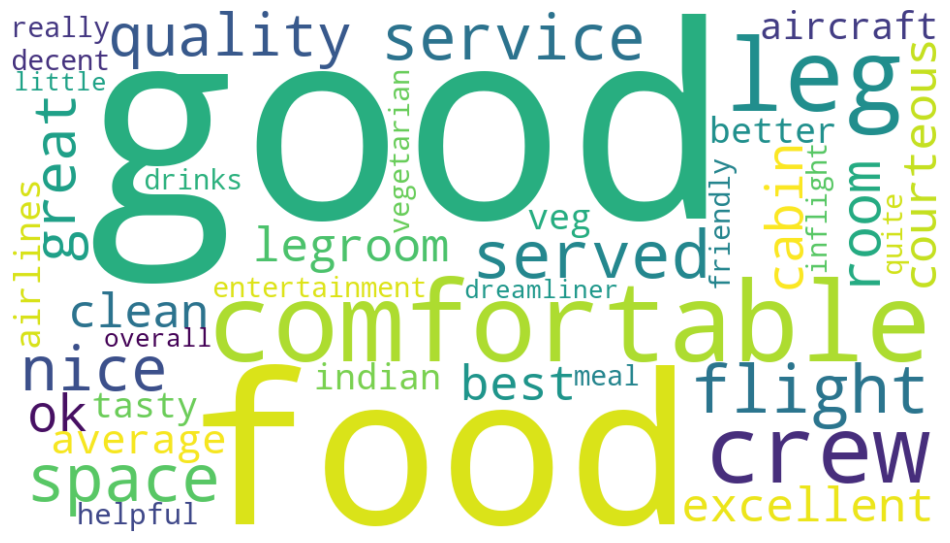

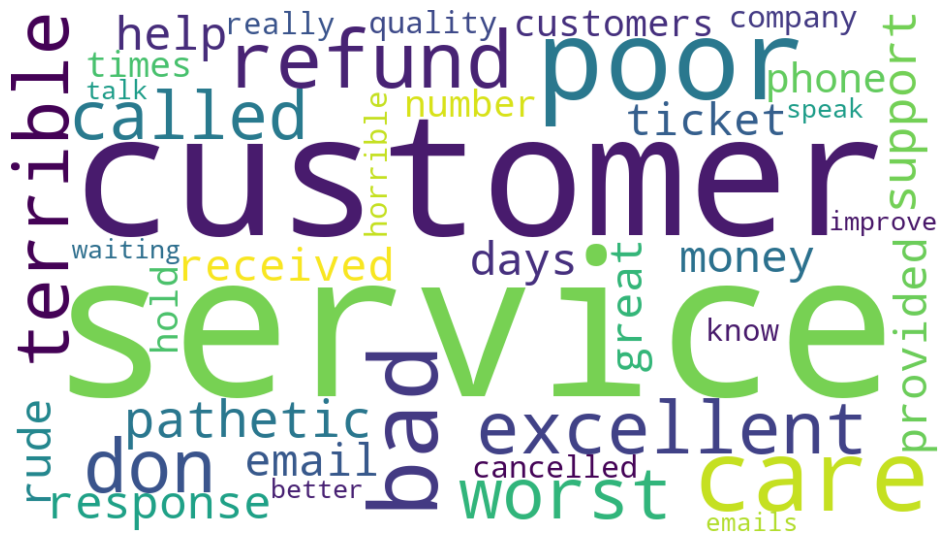

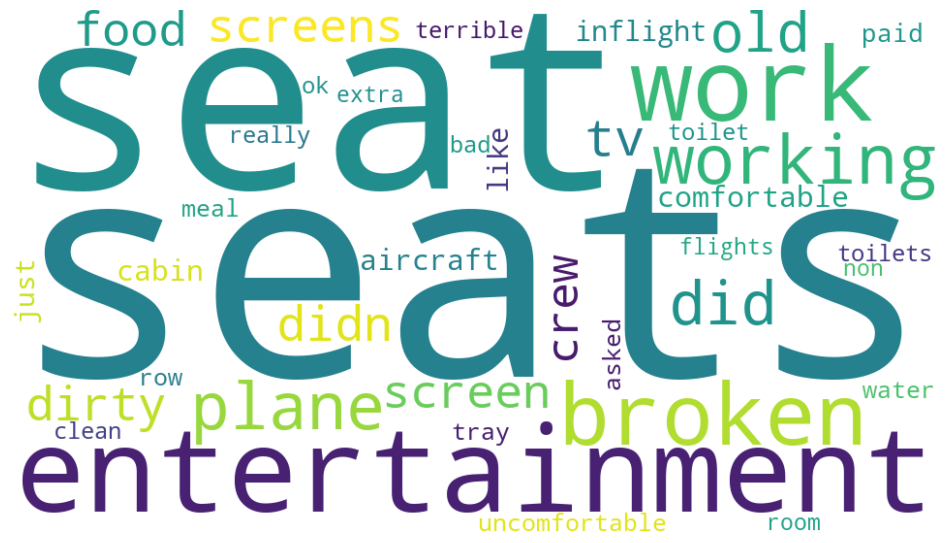

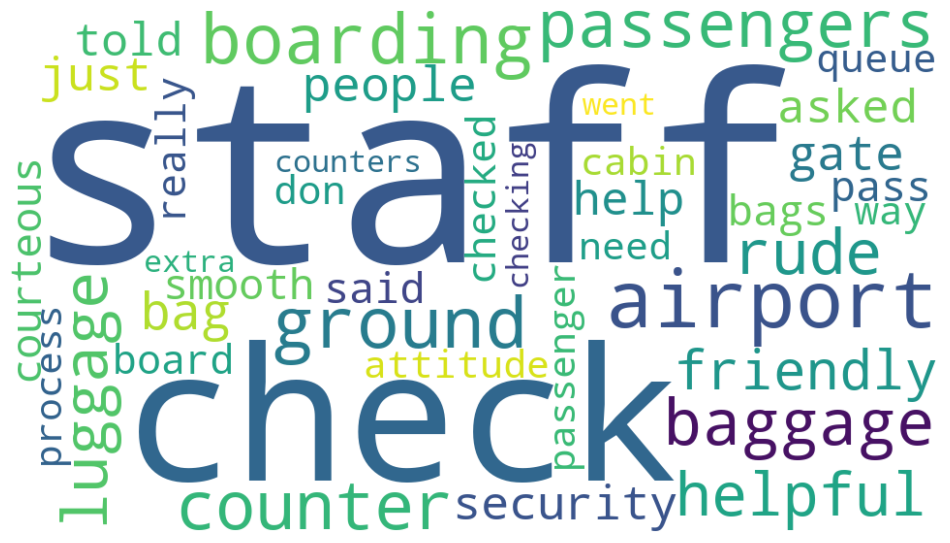

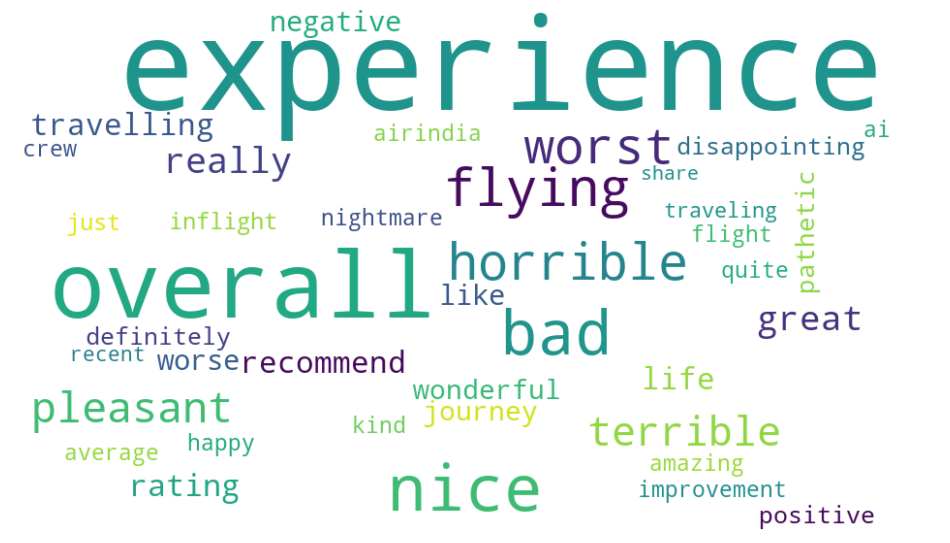

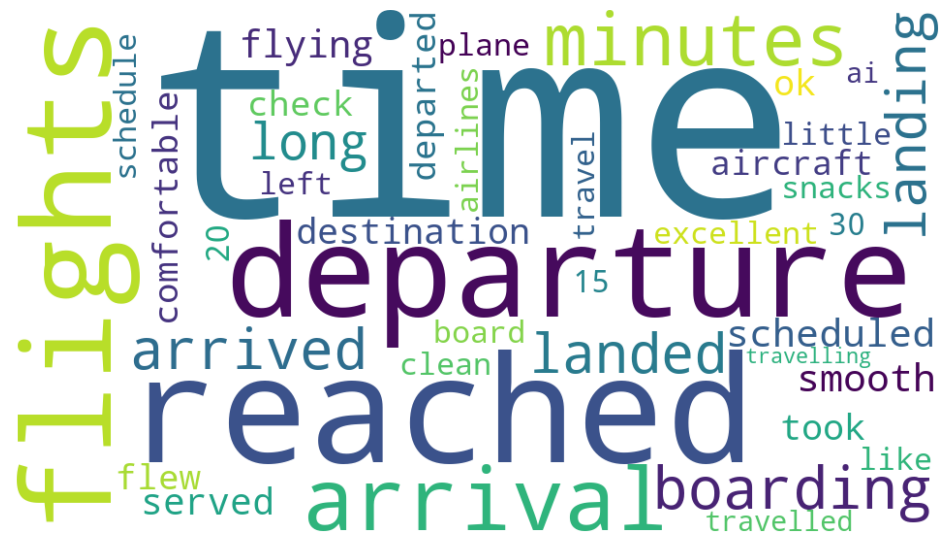

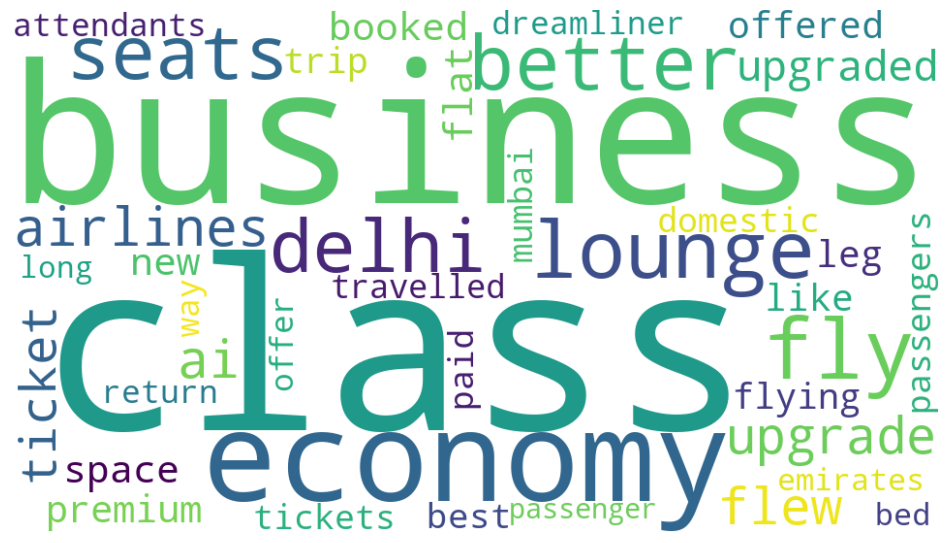

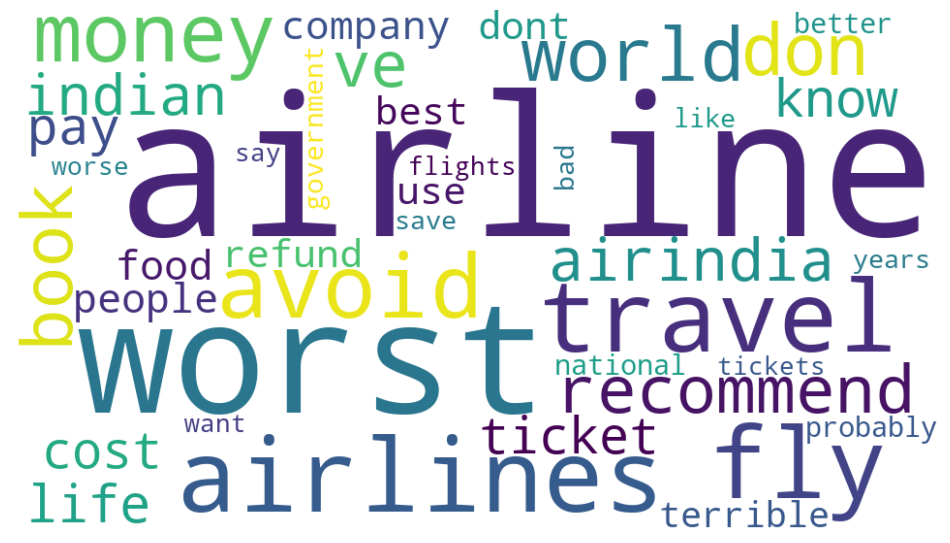

In [22]:
# Call the wordcloud_topics function with parameters
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

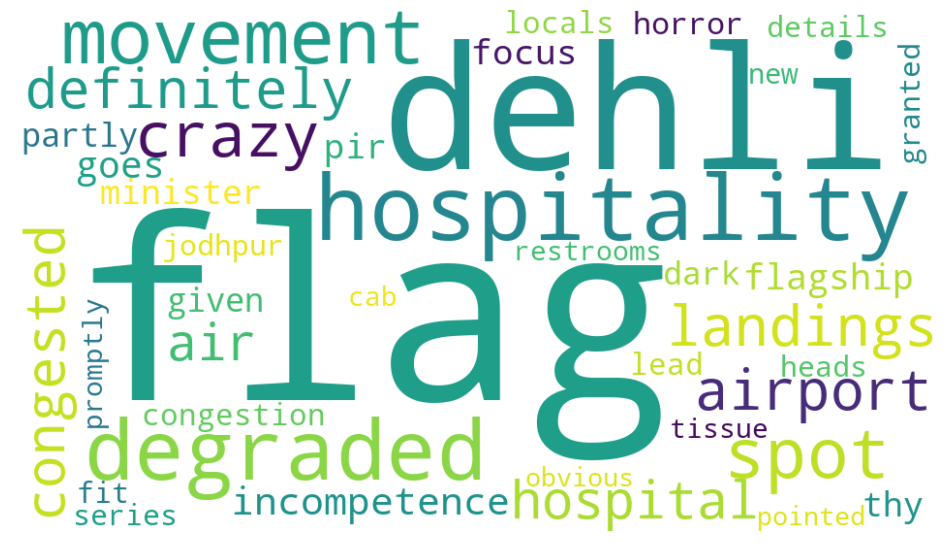

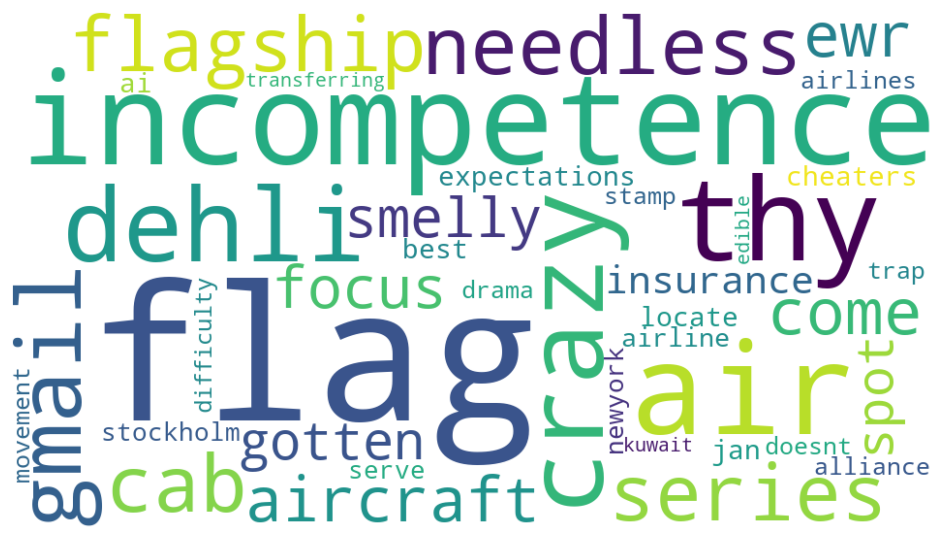

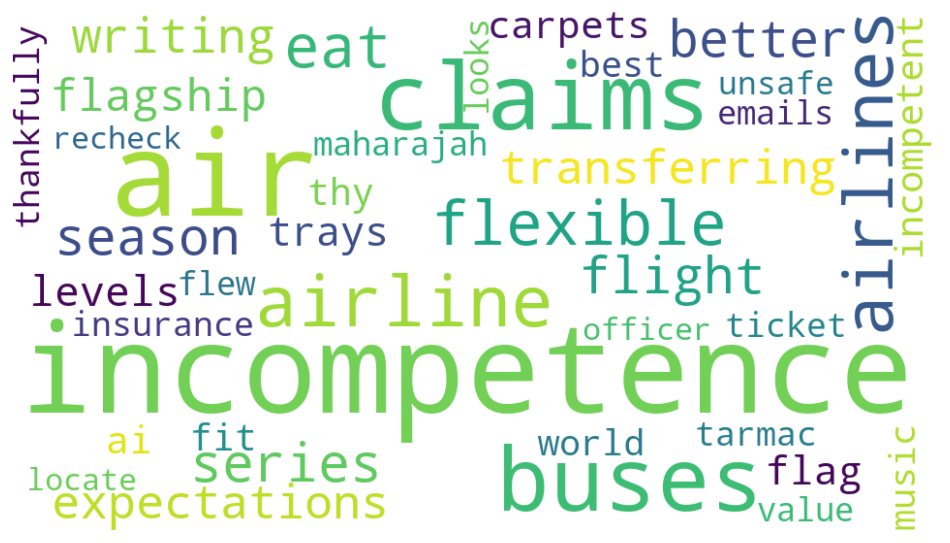

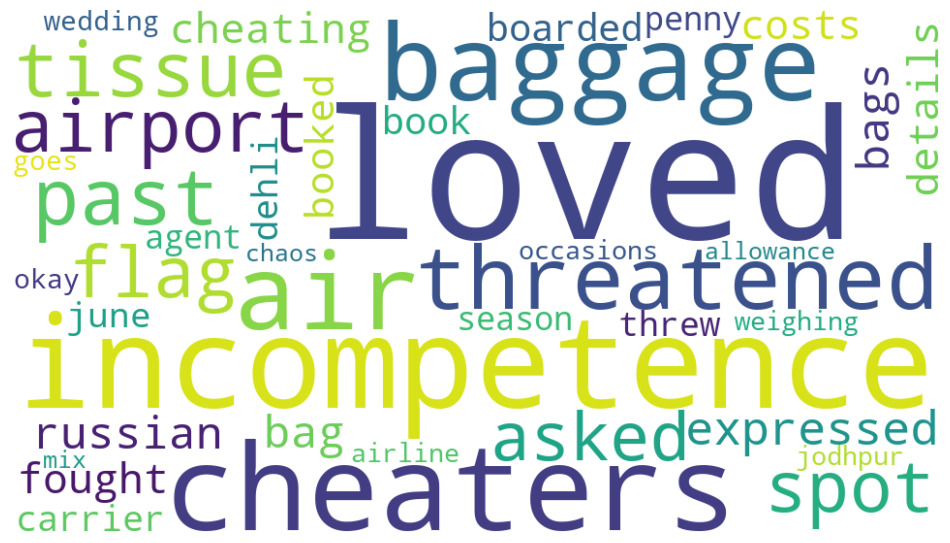

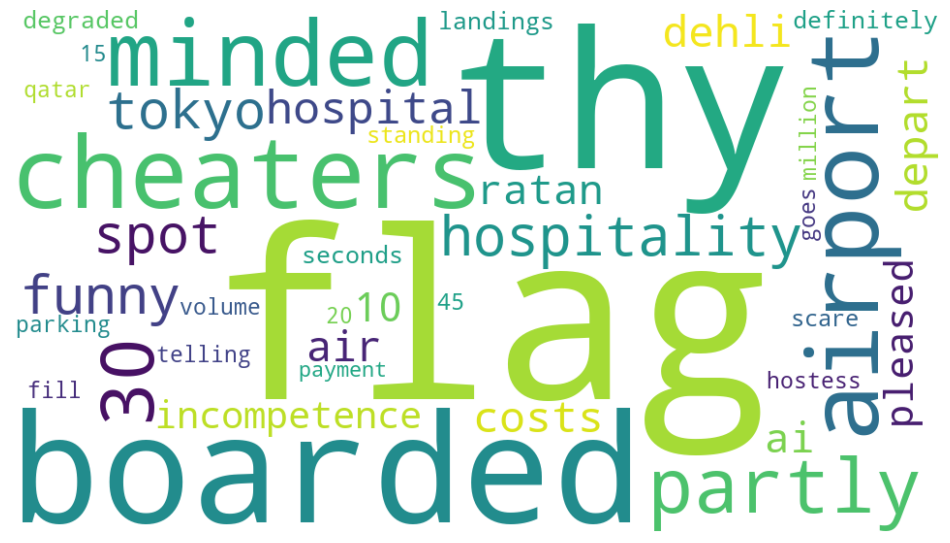

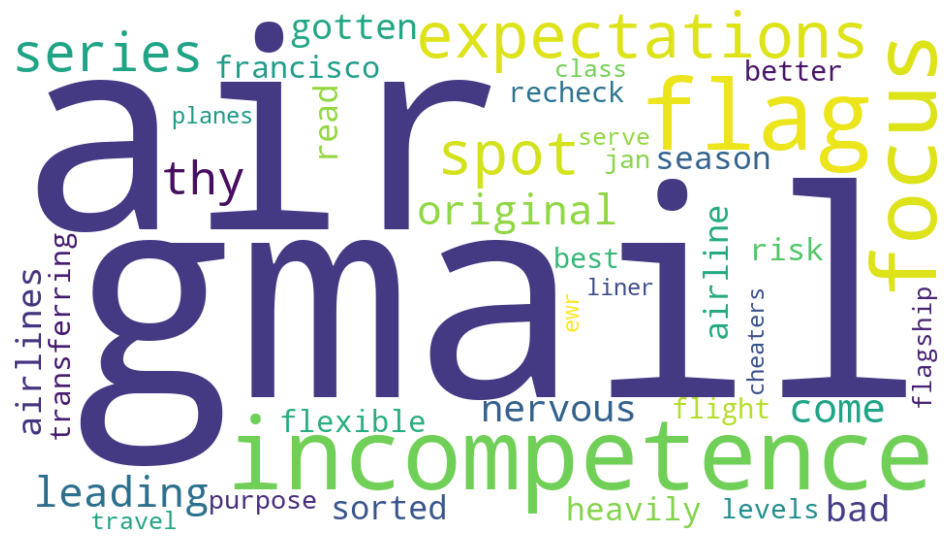

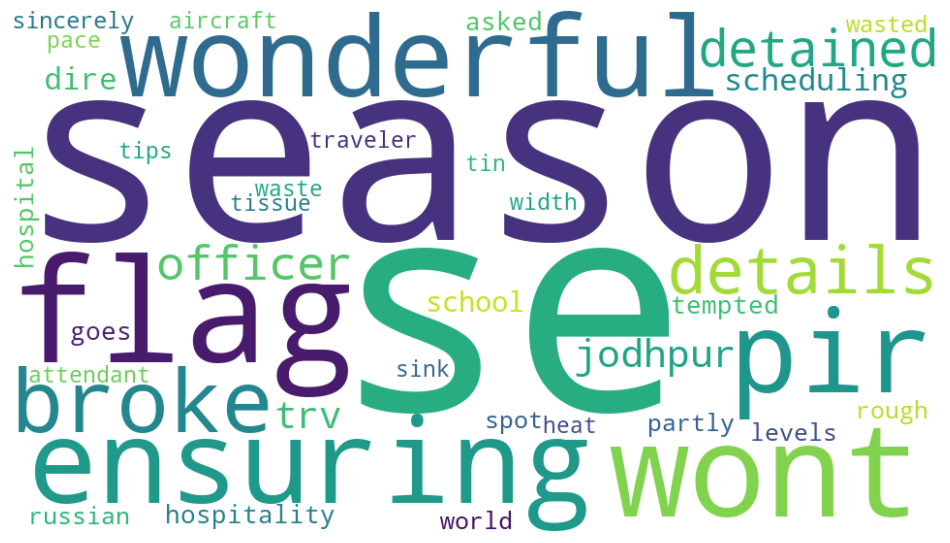

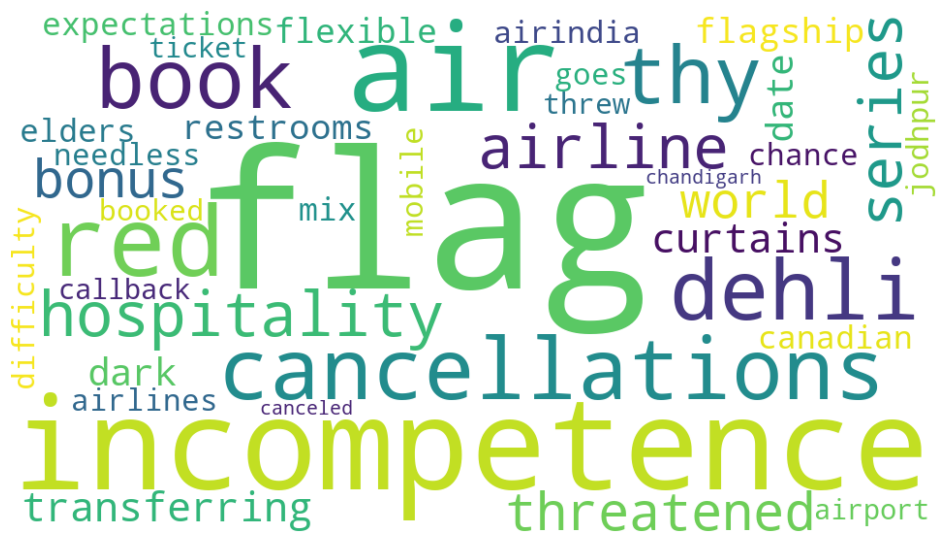

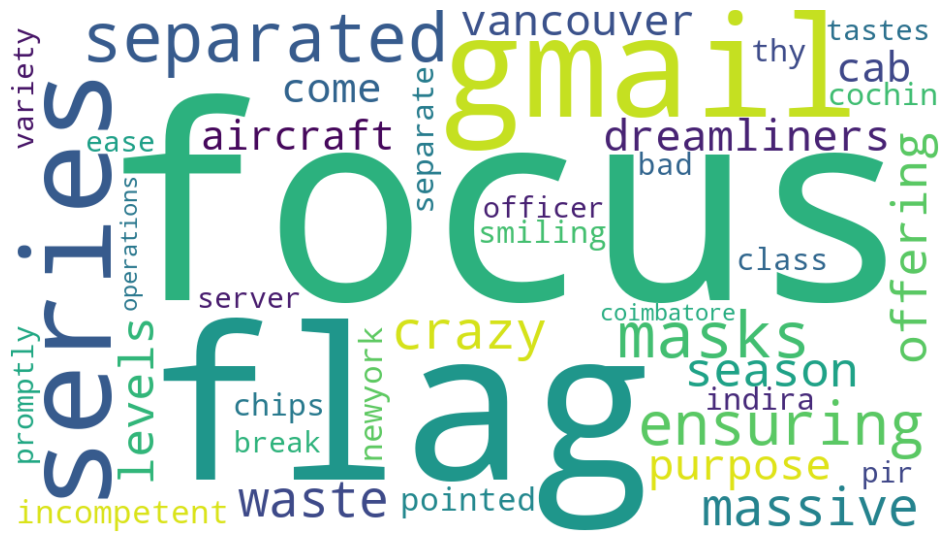

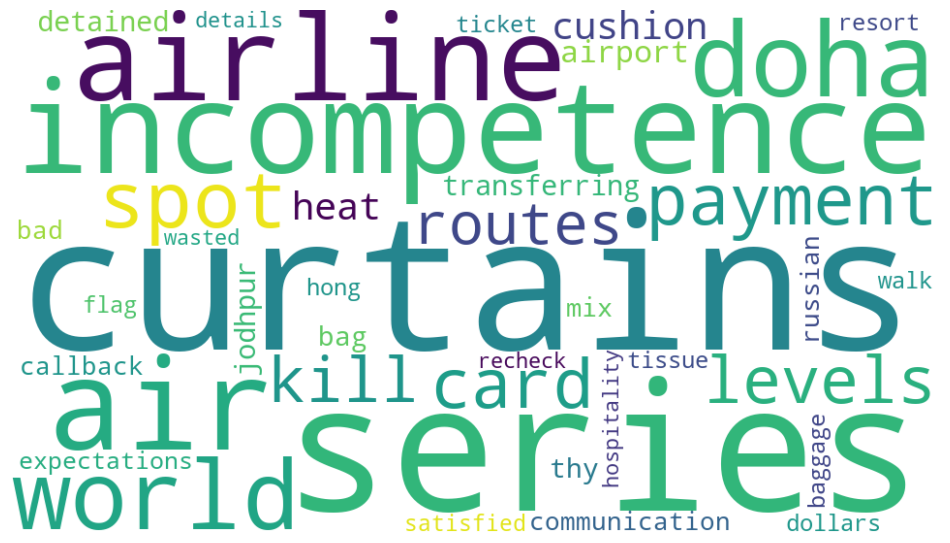

In [23]:
# Call the wordcloud_topics function with parameters
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

In [24]:
# Initialize an empty list to store the names of the topics.
topic_names = []

# Get the feature names from the TF-IDF vectorizer used in the NMF model.
voc = tfidf_para_vectorizer.get_feature_names_out()

# Iterate over each topic in the NMF model's components.
for topic in nmf_para_model.components_:
    # Get the indices of words sorted by importance within the topic.
    important = topic.argsort()
    
    # Extract the two most important words (with highest weights) from the vocabulary.
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    
    # Create a topic name by concatenating "Topic " with the two most important words.
    topic_names.append("Topic " + top_word)


In [25]:
# Import necessary libraries.
from tqdm.auto import tqdm  # For displaying progress bars
import numpy as np  # For numerical operations

# Initialize an empty list to store the data for each year.
year_data = []

# Get unique years from the "year" column of the paragraph dataframe.
unique_years = np.unique(paragraph_df["year"])

# Iterate over each unique year, tracking progress with tqdm.
for year in tqdm(unique_years):
    # Create a boolean mask for samples belonging to the current year.
    year_indices = np.array(paragraph_df["year"] == year)
    
    # Check if there are samples available for the current year.
    if np.any(year_indices):
        # Transform the TF-IDF vectors of paragraphs from the current year using the NMF model.
        W_year = nmf_para_model.transform(tfidf_para_vectors[year_indices])
        
        # Calculate the sum of probabilities for each topic across all documents for the current year,
        # then normalize the sums to get the percentage contribution of each topic.
        year_topic_distribution = W_year.sum(axis=0) / W_year.sum() * 100.0
        
        # Append the year along with its corresponding topic distribution to the year_data list.
        year_data.append([year] + list(year_topic_distribution))


  0%|          | 0/5 [00:00<?, ?it/s]

<Axes: xlabel='year'>

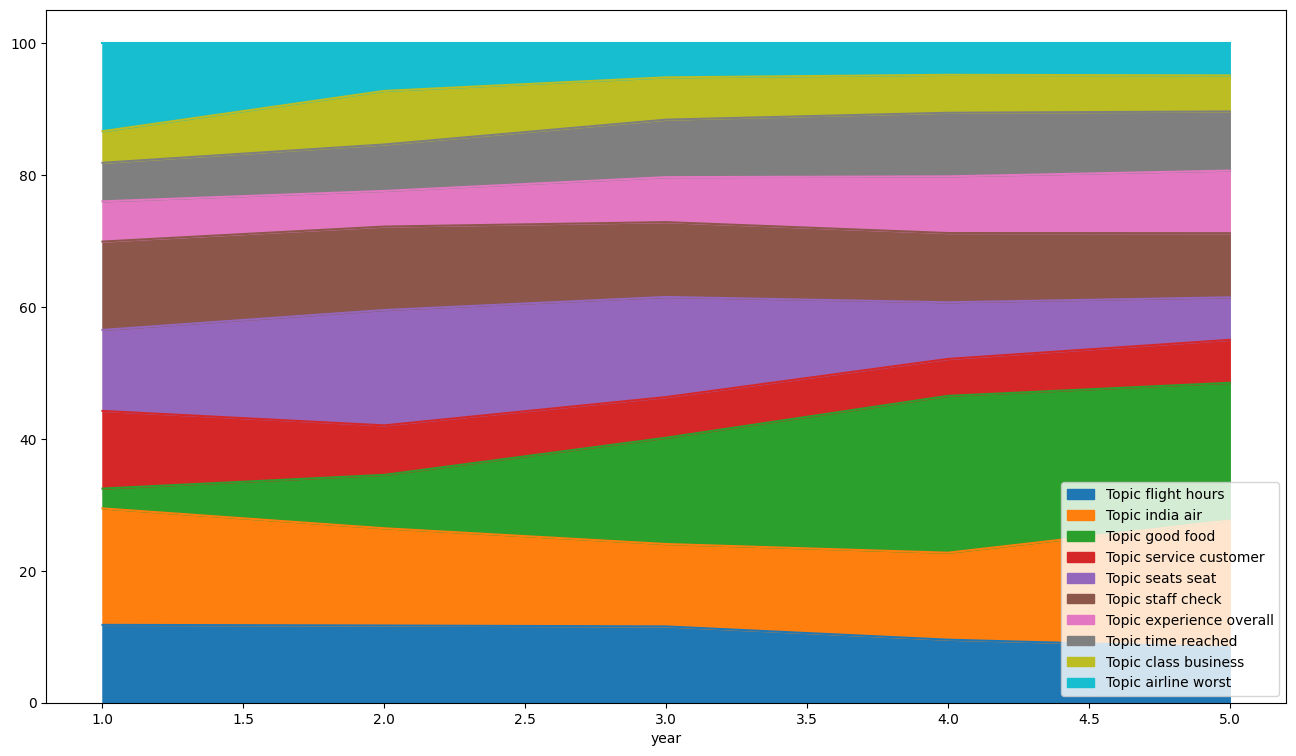

In [26]:
# Import the matplotlib library for visualization.
import matplotlib.pyplot as plt

# Import pandas library for data manipulation and analysis.
import pandas as pd

# Create a DataFrame 'df_year' from the 'year_data' list, with columns as topic names and index as years.
df_year = pd.DataFrame(year_data, columns=["year"] + topic_names).set_index("year")

# Plot an area plot for the DataFrame 'df_year' with years on the x-axis and topic distributions on the y-axis.
# figsize=(16,9) sets the size of the plot.
df_year.plot.area(figsize=(16,9))
